In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [2]:
import numpy as np
import pandas as pd
import time

In [3]:
df = pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [6]:
X.shape

(400, 2)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [8]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense

2026-01-15 10:15:12.712846: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768472112.938389      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768472113.004242      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768472113.534124      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768472113.534185      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768472113.534188      17 computation_placer.cc:177] computation placer alr

In [9]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-15 10:15:28.914491: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

# BatchSize=1 ,SGD

In [11]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history= model.fit(x_scaled,y,epochs = 100 , batch_size=1,validation_split = 0.2)
print(time.time()-start)

Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7614 - loss: 0.6245 - val_accuracy: 0.8125 - val_loss: 0.5576
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8575 - loss: 0.4374 - val_accuracy: 0.7875 - val_loss: 0.4703
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8752 - loss: 0.3031 - val_accuracy: 0.8125 - val_loss: 0.4056
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8857 - loss: 0.2496 - val_accuracy: 0.8125 - val_loss: 0.3695
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8768 - loss: 0.2709 - val_accuracy: 0.8625 - val_loss: 0.3465
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8860 - loss: 0.2670 - val_accuracy: 0.9000 - val_loss: 0.3031
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8309 - loss: 0.3461 - val_accuracy: 0.9125 - val_loss: 0.2956
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8707 - loss: 0.2616 - val_accu

(0.0, 1.0)

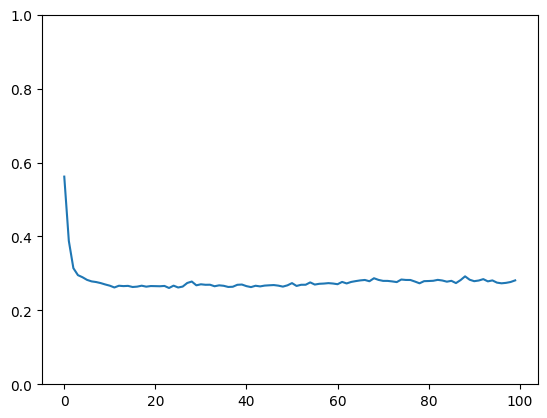

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.ylim(0,1)

# Batch_size = 320, BGD

In [13]:
model2 = Sequential()

model2.add(Dense(10,activation='relu',input_dim=2))
model2.add(Dense(10,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

In [14]:
model2.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history2 = model2.fit(x_scaled , y, epochs=100, batch_size = 320,validation_split=0.2)
print(time.time()-start)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step - accuracy: 0.7844 - loss: 0.6436 - val_accuracy: 0.5125 - val_loss: 0.7968
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.7906 - loss: 0.6347 - val_accuracy: 0.5250 - val_loss: 0.7931
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.7937 - loss: 0.6284 - val_accuracy: 0.5375 - val_loss: 0.7900
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8000 - loss: 0.6232 - val_accuracy: 0.5375 - val_loss: 0.7872
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8062 - loss: 0.6185 - val_accuracy: 0.5375 - val_loss: 0.7847
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8062 - loss: 0.6143 - val_accuracy: 0.5625 - val_loss: 0.7824
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8031 - loss: 0.6103 - val_accuracy: 0.5625 - val_loss: 0.7803
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.8031 - loss: 0.6066 - val_accuracy: 0.5625 - val_loss

(0.0, 1.0)

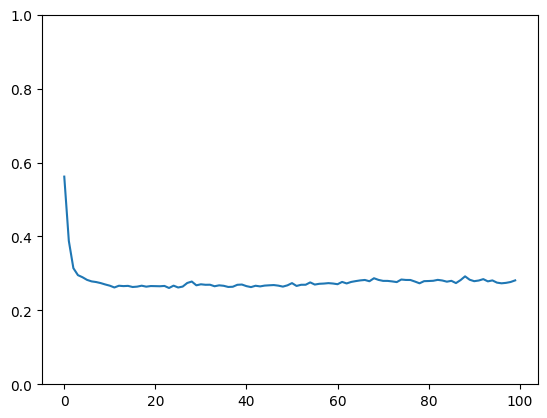

In [15]:
plt.plot(history.history['loss'])
plt.ylim(0,1)

BGD took comparatively less time than SGD because of vectorization and updates happening only once , but Loss is lower of SGD